<a href="https://colab.research.google.com/github/tarakakiranmayi/Machine-Learning-projects/blob/main/calario_brust_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn.metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor


data->data precrosseing->data analysis->xgrbootser->traintestt->modle

In [35]:
data=pd.read_csv('/content/exercise.csv')
y=pd.read_csv('/content/calories.csv')
#combining two data frames using concat from pandas
calories=pd.concat([data,y['Calories']],axis=1)
data.head()
data.shape
data.info()
data.describe()
data.isnull().sum()
plt.figure(figsize=(10,10))
plt.plot(data['Duration'],y['Calories'])
plt.show()
x=data[]
plt.figure(figsize=(10,10))
plt.bar(data['Gender'],)
plt.show()

In [54]:
calories.head()
#statsistical data
calories.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


data analysis


<ipython-input-50-b3f7ca2cc11f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(calories['Calories'])


<Axes: xlabel='Calories', ylabel='Density'>

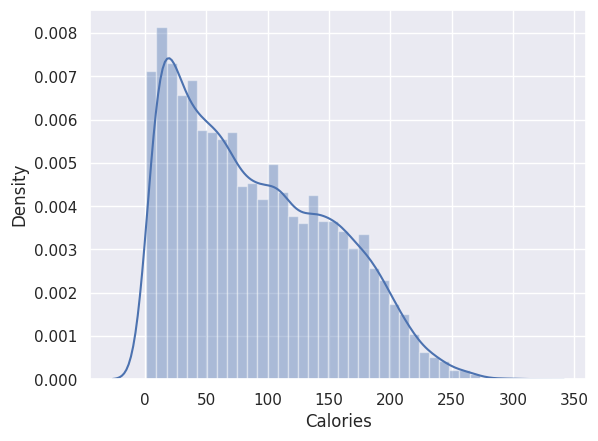

In [50]:
sns.set()
sns.countplot(x='Gender',data=calories)
#distribution plot for findging distribution of age column
sns.distplot(calories['Age'])
sns.distplot(calories['Height'])
sns.distplot(calories['Weight'])
sns.distplot(calories['Duration'])
sns.distplot(calories['Calories'])

finding the correlation for the data

In [94]:
correl=calories.corr()
correl
df = pd.get_dummies(calories, columns=['Gender'])
correl=df.corr()
#creating a head map
#cmap is color blue and cbar is blue squres is the box fmt means for the float and annot is for values display on box size is maters means size of the value to appear
plt.figure(figsize=(10,10))
sns.heatmap(correl,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')
#replace male with 1 female as 0
calories.replace({'Gender':{'male':1,'female':0}},inplace=True)
x=calories.drop(columns='Calories',axis=1)
x=x.drop(columns='User_ID',axis=1)
y=calories['Calories']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
model=XGBRegressor()
model.fit(x_train,y_train)
pred1=model.predict(x_test)
pred2=model.predict(x_train)
score1=sklearn.metrics.r2_score(y_test,pred1)
score2=sklearn.metrics.r2_score(y_train,pred2)
print(score1)
print(score2)
#mean absolute error
print(sklearn.metrics.mean_absolute_error(pred2,y_train))
print(sklearn.metrics.mean_absolute_error(pred1,y_test))

1.4833678883314132
